# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
# Loading the data:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Commands used to view the data:
    # len(websites)
    # websites.dtypes 
    # websites.head(5)

In [51]:
# Checking the nulls and realizing there are "Nones" as well, so checking those as well.
def count_None(x): return sum(x == 'None')
for col in websites.columns:
    print(col,'-------->',count_None(websites[col]))
print(websites.isna().sum())
    
# Dropping the single NaN on the numerical variables.
websites.dropna(inplace = True, subset = ['DNS_QUERY_TIMES'])

 # Converting Strings to Datetimes
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'], format = '%d/%m/%Y  %H:%M', errors = 'coerce')
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'], format = '%d/%m/%Y  %H:%M', errors = 'coerce')

In [5]:
# Converting the 0-1 to boolean.
websites["Type"] = websites["Type"].astype(bool)

In [52]:
# Fixing the Country variable.
replace_dict = {'se':'SE','United Kingdom':'GB','ru':'RU','us':'US','Cyprus':'CY',"[u'GB'; u'UK']":'GB'}
websites.replace({"WHOIS_COUNTRY": replace_dict}, inplace = True)
websites['WHOIS_COUNTRY'].unique()

In [53]:
websites['WHOIS_STATEPRO'] = websites['WHOIS_STATEPRO'].str.upper()
websites['WHOIS_STATEPRO'].unique()
### Normally one would clean this in the same way we did WHOIS_COUNTRY, but perhaps we are better dropping it.
### It is a mess. Anyway, let's leave that for later.

In [8]:
### There are a bunch of 'None' which are the same as NaN in practice, but differently encoded.
websites.replace({'None':np.nan}, inplace = True)

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

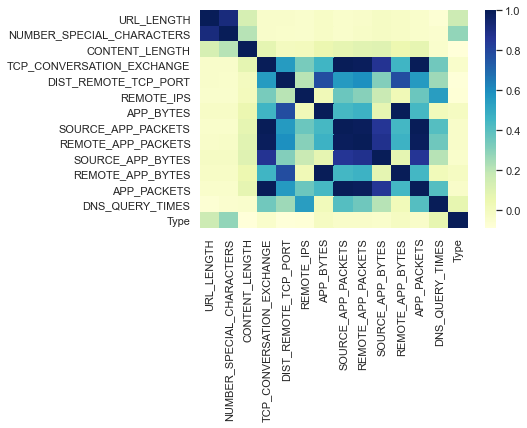

In [56]:
# Your code here
corr = websites.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [10]:
# Your code here
websites.drop('URL_LENGHT', axis = 1, inplace = True)
websites.drop('NUMBER_SPECIAL_CHARACTERS', axis = 1, inplace = True)

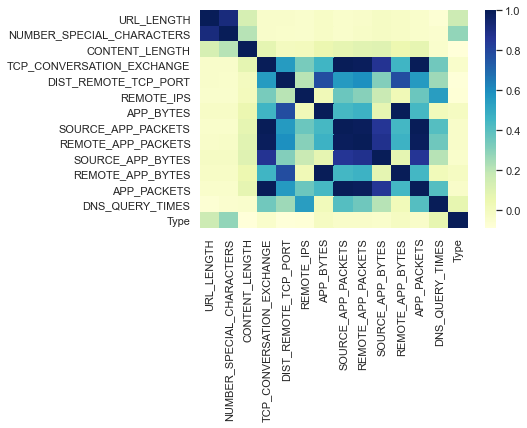

0.9892847140132188
0.997796744200037
0.9999919795761659


In [11]:
# Your code here
corr = websites.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

column_1 = websites["SOURCE_APP_PACKETS"]
column_2 = websites["REMOTE_APP_PACKETS"]
correlation = column_1.corr(column_2)
print(correlation)

column_1 = websites["TCP_CONVERSATION_EXCHANGE"]
column_2 = websites["APP_PACKETS"]
correlation = column_1.corr(column_2)
print(correlation)

column_1 = websites["REMOTE_APP_BYTES"]
column_2 = websites["APP_BYTES"]
correlation = column_1.corr(column_2)
print(correlation)

In [12]:
# Your comment here
websites_fixed = websites.drop(['SOURCE_APP_PACKETS',"TCP_CONVERSATION_EXCHANGE","REMOTE_APP_BYTES"], axis = 1)

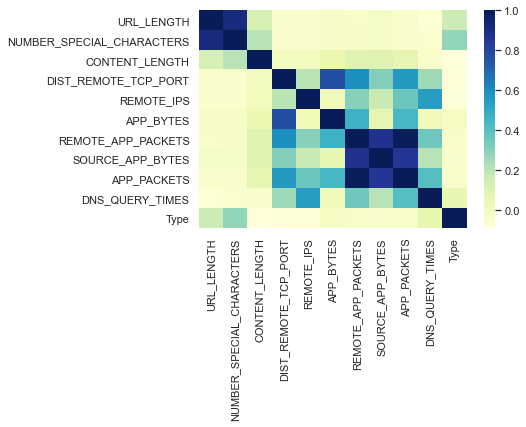

0.9892847140132188


In [13]:
# Print heatmap again
corr = websites_fixed.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

column_1 = websites["REMOTE_APP_PACKETS"]
column_2 = websites["APP_PACKETS"]
correlation = column_1.corr(column_2)
print(correlation)

#### One could think of dropping more columns given this correlation, but let's leave it at that as 
#### the exercise suggests

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [14]:
### Done in Challenge 1

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
### The instructions seems to imply that the column CONTENT_LENGTH should be deleted.
### I would not do it on my own. 
### It is unclear to me why can't these things have 0 content and that be NaNs in our case.
### Anyway, here it is:
websites_fixed = websites.drop(['CONTENT_LENGTH'], axis = 1)
### Rational for other drops: Done in Challenge 1

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [17]:
# Examine missing values in each column

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [57]:
# Your code here

### Done in challenge one given that it states:
    # You should already been very familiar with the procedures now so we won't provide the instructions step by step. 
    # Reflect on what you did in the previous labs and explore the dataset.

    # So I did that.
    # I would copy paste it here, but I noticed that some of the decisions I made were done in a different order.
    # Not a good ideia to redo stuff here then...
    # Anyway, the replacements above are done (and others)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [19]:
websites_fixed['WHOIS_COUNTRY'].value_counts()

US    1106
CA      83
ES      63
AU      35
GB      25
PA      21
JP      11
UK      10
CN      10
IN      10
CZ       9
FR       9
RU       6
NL       6
CH       6
KR       5
SE       4
AT       4
BS       4
PH       4
BE       3
HK       3
KY       3
DE       3
SC       3
TR       3
CY       2
BR       2
UA       2
UY       2
SI       2
KG       2
NO       2
IL       2
IT       1
AE       1
BY       1
UG       1
TH       1
IE       1
PK       1
LU       1
LV       1
Name: WHOIS_COUNTRY, dtype: int64

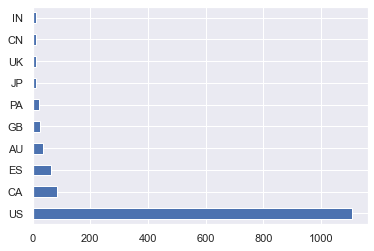

In [20]:
CountStatus = websites_fixed['WHOIS_COUNTRY'].value_counts().head(10)
CountStatus.plot.barh()
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [21]:
# Your code here
top_countries_list = list(websites_fixed['WHOIS_COUNTRY'].value_counts().reset_index()['index'])
replace_dict = {}
for i in range(len(top_countries_list)):
    if i<10:
        replace_dict[top_countries_list[i]] = top_countries_list[i]
    else:
        replace_dict[top_countries_list[i]] = 'Other'

websites.replace({"WHOIS_COUNTRY": replace_dict}, inplace = True)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [22]:
# Your code here
websites_fixed.drop('WHOIS_STATEPRO', axis = 1, inplace = True)
websites_fixed.drop('WHOIS_REGDATE', axis = 1, inplace = True)
websites_fixed.drop('WHOIS_UPDATED_DATE', axis = 1, inplace = True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [23]:
# Your code here
websites_fixed.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                            bool
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [24]:
# Your code here
websites_fixed.drop('URL', axis = 1, inplace = True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [25]:
# Your code here
websites_fixed['CHARSET'].value_counts()

UTF-8           675
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1252      1
windows-1251      1
ISO-8859          1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [58]:
# Your code here
websites_fixed['SERVER'].unique()

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [27]:
# Your code here

# I noticed that if we do that some lines (such as mw2178.codfw.wmnet', '294', 'Microsoft-IIS/6.0', 'nginx/1.7.4')
# Have more than one...
# Since I am not sure I understand this data, for me those will also be 'Other'

servers_list = list(websites_fixed['SERVER'])
replace_dict = {}

for row in servers_list:
    if(isinstance(row, str)):
        if 'Microsoft' in row and 'Apache' not in row and 'nginx' not in row:
            replace_dict[row] = 'Microsoft'
        elif 'Apache' in row and 'Microsoft' not in row and 'nginx' not in row:
            replace_dict[row] = 'Apache'
        elif 'nginx' in row and 'Microsoft' not in row and 'Apache' not in row:
            replace_dict[row] = 'nginx'
        else:
            replace_dict[row] = 'Other'
    else:
        replace_dict[row] = 'Other'

replace_dict
    
websites_fixed.replace({"SERVER": replace_dict}, inplace = True)    

In [60]:
# Count `SERVER` value counts here
print('NaN','                          ',websites['SERVER'].isna().sum())
print('----------------------------------------------------------------')
print(websites['SERVER'].value_counts())

NaN                            176
----------------------------------------------------------------
Apache                                                                                                      385
nginx                                                                                                       211
Microsoft-HTTPAPI/2.0                                                                                       113
cloudflare-nginx                                                                                             94
Microsoft-IIS/7.5                                                                                            51
                                                                                                           ... 
Apache/2.2.10 (Linux/SUSE)                                                                                    1
Apache/2.2.16 (Unix) mod_ssl/2.2.16 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4      1
Bost

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [29]:
# Your code here
website_dummy = pd.get_dummies(websites_fixed)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [30]:
# Your code here
pd.Series(website_dummy.dtypes.reset_index()[0].unique())

0      int64
1    float64
2       bool
3      uint8
dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [31]:
website_dummy.isna().sum().head(25)

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
CHARSET_ISO-8859             0
CHARSET_ISO-8859-1           0
CHARSET_UTF-8                0
CHARSET_iso-8859-1           0
CHARSET_us-ascii             0
CHARSET_utf-8                0
CHARSET_windows-1251         0
CHARSET_windows-1252         0
SERVER_Apache                0
SERVER_Microsoft             0
SERVER_Other                 0
SERVER_nginx                 0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
# Your code here:
x_train, x_test, y_train, y_test = train_test_split(website_dummy.drop('Type',axis=1),website_dummy['Type'], test_size = 0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [33]:
# Your code here:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [34]:
# Your code here:
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8960674157303371
0.901685393258427


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [43]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = y_test
print(accuracy_score(model.predict(x_test),y_pred))
confusion_matrix(model.predict(x_test),y_pred)

0.901685393258427


array([[310,  29],
       [  6,  11]], dtype=int64)

What are your thoughts on the performance of the model? Write your conclusions below.

In [36]:
# Your conclusions here:
### The model despite having a high accuracy, has a big issue with false negatives.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [44]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [46]:
# Your code here:
model = model.fit(x_train, y_train)
y_pred = y_test
print(accuracy_score(model.predict(x_test),y_pred))
confusion_matrix(model.predict(x_test),y_pred)

0.9606741573033708


array([[313,  11],
       [  3,  29]], dtype=int64)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [47]:
# Your code here:
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(x_train, y_train)
y_pred = y_test
print(accuracy_score(model.predict(x_test),y_pred))
confusion_matrix(model.predict(x_test),y_pred)

0.9438202247191011


array([[307,  11],
       [  9,  29]], dtype=int64)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [40]:
# Your conclusions here:
### Not really, accuracy even drops, I feel the best model with this data is the knn, k=3.
### Also out of the three models it is the one with least of an issue on false negatives.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [50]:
# Your code here
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
x_train_scaled = robust_scaler.fit_transform(x_train)
x_test_scaled = robust_scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
print(model.score(x_train_scaled, y_train))
print(model.score(x_test_scaled, y_test))

0.9382022471910112
0.949438202247191


In [ ]:
### Yes, indeed there is an improvement, also there is no convergence warning.